In [162]:
#task 1

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar


In [164]:
def f(x):
    return x**3 - 2*x**2 - 5

In [165]:
x = np.linspace(1, 4, 500)

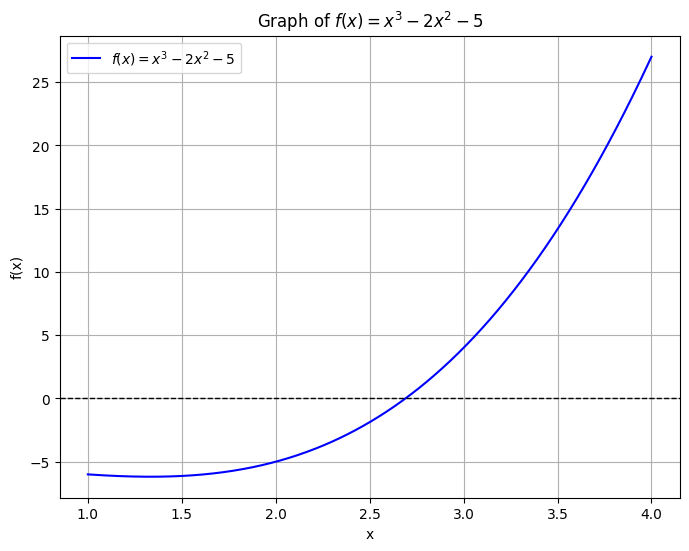

In [166]:
plt.figure(figsize=(8, 6))
plt.plot(x, f(x), label=r'$f(x) = x^3 - 2x^2 - 5$', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # x-axis
plt.title("Graph of $f(x) = x^3 - 2x^2 - 5$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

In [167]:
approx_root = 2.5
print(f"Approximate root (from graph): {approx_root}")

Approximate root (from graph): 2.5


In [168]:
approx_f_value = f(approx_root)
print(f"f({approx_root}) = {approx_f_value}")

f(2.5) = -1.875


In [169]:
result = root_scalar(f, bracket=[1, 4], method='bisect')
exact_root = result.root
print(f"Exact root (using numerical method): {exact_root}")

Exact root (using numerical method): 2.690647448027903


In [170]:
absolute_error = abs(exact_root - approx_root)
print(f"Absolute error: {absolute_error}")

Absolute error: 0.190647448027903


In [171]:
#2 task

In [172]:
def f(x):
    return np.exp(x) - 2*x - 3

In [173]:
def bisection_method(f, a, b, tol=1e-6):
    iterations = 0
    while (b - a) / 2 > tol:
        iterations += 1
        c = (a + b) / 2
        if f(c) == 0:  
            break
        elif f(a) * f(c) < 0:
            b = c 
        else:
            a = c  
    return (a + b) / 2, iterations

In [174]:
def secant_method(f, x0, x1, tol=1e-6):
    iterations = 0
    while abs(x1 - x0) > tol:
        iterations += 1
        fx0, fx1 = f(x0), f(x1)
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x2
    return x1, iterations

In [175]:
root_bisection, iterations_bisection = bisection_method(f, 0, 2)
print(f"Bisection Method: Root = {root_bisection}, Iterations = {iterations_bisection}")

Bisection Method: Root = 1.9239377975463867, Iterations = 20


In [176]:
root_secant, iterations_secant = secant_method(f, 0, 2)
print(f"Secant Method: Root = {root_secant}, Iterations = {iterations_secant}")

Secant Method: Root = 1.923938750346989, Iterations = 6


In [177]:
exact_root_result = root_scalar(f, bracket=[0, 2], method='bisect')
exact_root = exact_root_result.root

In [178]:
relative_error_bisection = abs((exact_root - root_bisection) / exact_root)
relative_error_secant = abs((exact_root - root_secant) / exact_root)


In [211]:
print(f"Exact Root: {exact_root}")
print(f"Relative Error (Bisection): {relative_error_bisection}")
print(f"Relative Error (Secant): {relative_error_secant}")

Exact Root: 1.9239387503457692
Relative Error (Bisection): 4.952337398120953e-07
Relative Error (Secant): 6.339552205775754e-13


In [181]:
if iterations_bisection > iterations_secant:
    print("Secant Method is more efficient than Bisection Method.")
else:
    print("Bisection Method is more efficient than Secant Method.")

Secant Method is more efficient than Bisection Method.


In [182]:
#task 3

In [183]:
def f(x):
    return x**2 - 3*x + 2

In [184]:
def f_prime(x):
    return 2*x - 3

In [185]:
def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=100):
    iterations = []
    errors = []
    x = x0
    for i in range(max_iter):
        fx = f(x)
        fpx = f_prime(x)
        if fpx == 0:
            raise ValueError("Derivative is zero. No solution found.")
        x_new = x - fx / fpx
        abs_error = abs(x_new - x)
        rel_error = abs_error / abs(x_new) if x_new != 0 else np.inf
        iterations.append((i + 1, x, abs_error, rel_error))
        errors.append(abs_error)
        
        if abs_error < tol:
            break
        x = x_new
    return x, iterations, errors

In [186]:
x0 = 2.5
root, iteration_data, abs_errors = newton_raphson(f, f_prime, x0)


In [187]:
print(f"Root found: {root}")
print(f"Number of iterations: {len(iteration_data)}\n")
print("Iteration | Current Guess | Absolute Error | Relative Error")
for iter_num, guess, abs_err, rel_err in iteration_data:
    print(f"{iter_num:>9} | {guess:>13.6f} | {abs_err:>14.6e} | {rel_err:>14.6e}")

Root found: 2.000000023230574
Number of iterations: 5

Iteration | Current Guess | Absolute Error | Relative Error
        1 |      2.500000 |   3.750000e-01 |   1.764706e-01
        2 |      2.125000 |   1.125000e-01 |   5.590062e-02
        3 |      2.012500 |   1.234756e-02 |   6.173310e-03
        4 |      2.000152 |   1.524158e-04 |   7.620790e-05
        5 |      2.000000 |   2.323057e-08 |   1.161529e-08


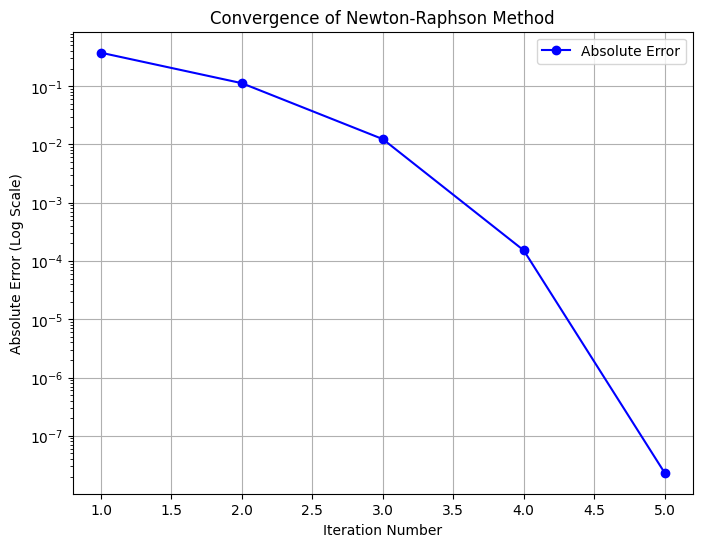

In [188]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(abs_errors) + 1), abs_errors, marker='o', color='blue', label='Absolute Error')
plt.yscale('log')  # Logarithmic scale for better visualization
plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error (Log Scale)')
plt.title('Convergence of Newton-Raphson Method')
plt.grid(True)
plt.legend()
plt.show()

In [189]:
#task 4

In [190]:
import cmath

In [191]:
def f(x):
    return x**3 + x**2 + x + 1

In [192]:
def mullers_method(f, x0, x1, x2, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        f0, f1, f2 = f(x0), f(x1), f(x2)

        h1, h2 = x1 - x0, x2 - x1
        delta1 = (f1 - f0) / h1
        delta2 = (f2 - f1) / h2
        d = (delta2 - delta1) / (h2 + h1)

        a = d
        b = delta2 + h2 * d
        c = f2

        discriminant = cmath.sqrt(b**2 - 4*a*c)
        if abs(b + discriminant) > abs(b - discriminant):
            root = -2 * c / (b + discriminant)
        else:
            root = -2 * c / (b - discriminant)

        x3 = x2 + root

        if abs(f(x3)) < tol:
            return x3, i + 1
        x0, x1, x2 = x1, x2, x3
    
    raise ValueError("Muller's method did not converge within the maximum number of iterations")


In [193]:
x0, x1, x2 = -2, 0, 1
root, iterations = mullers_method(f, x0, x1, x2)
abs_error = abs(f(root))

In [194]:
print(f"Root found: {root}")
print(f"Number of iterations: {iterations}")
print(f"Absolute Error: {abs_error:.6e}")

print(f"Verification: f(root) = {f(root):.6e}")

Root found: (2.80064321140852e-09-1.0000000084212677j)
Number of iterations: 7
Absolute Error: 2.510161e-08
Verification: f(root) = -2.244382e-08+1.124125e-08j


In [195]:
#task 5

In [196]:
def f(x):
    return x**2 - 2*x


In [197]:
def false_position(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("The function must have opposite signs at the endpoints a and b.")
    iterations = []
    errors = []
    x_prev = None

    for i in range(max_iter):
        c = b - f(b) * (b - a) / (f(b) - f(a))
        abs_error = abs(c - x_prev) if x_prev is not None else np.inf
        rel_error = abs_error / abs(c) if c != 0 else np.inf

        iterations.append((i + 1, c, abs_error, rel_error))
        errors.append(abs_error)

        if abs(f(c)) < tol or abs_error < tol:
            return c, iterations, errors

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        
        x_prev = c
    
    raise ValueError("False Position Method did not converge within the maximum number of iterations")



In [198]:
a, b = 0.1, 3  
root, iteration_data, abs_errors = false_position(f, a, b)

In [199]:
print(f"Root found: {root}")
print(f"Number of iterations: {len(iteration_data)}\n")
print("Iteration | Current Approximation | Absolute Error | Relative Error")
for iter_num, approx, abs_err, rel_err in iteration_data:
    print(f"{iter_num:>9} | {approx:>20.6f} | {abs_err:>14.6e} | {rel_err:>14.6e}")


Root found: 1.999999705746117
Number of iterations: 17

Iteration | Current Approximation | Absolute Error | Relative Error
        1 |             0.272727 |            inf |            inf
        2 |             0.642857 |   3.701299e-01 |   5.757576e-01
        3 |             1.173913 |   5.310559e-01 |   4.523810e-01
        4 |             1.620000 |   4.460870e-01 |   2.753623e-01
        5 |             1.854962 |   2.349618e-01 |   1.266667e-01
        6 |             1.949198 |   9.423603e-02 |   4.834606e-02
        7 |             1.982774 |   3.357639e-02 |   1.693405e-02
        8 |             1.994225 |   1.145067e-02 |   5.741916e-03
        9 |             1.998071 |   3.846338e-03 |   1.925025e-03
       10 |             1.999357 |   1.285412e-03 |   6.429127e-04
       11 |             1.999786 |   4.288382e-04 |   2.144421e-04
       12 |             1.999928 |   1.429870e-04 |   7.149604e-05
       13 |             1.999976 |   4.766686e-05 |   2.383372e-05
     

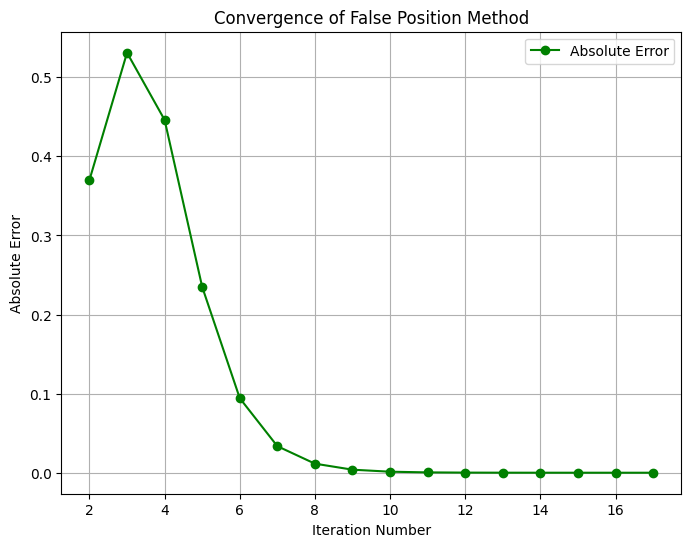

In [200]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(abs_errors) + 1), abs_errors, marker='o', color='green', label='Absolute Error')
plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error')
plt.title('Convergence of False Position Method')
plt.grid(True)
plt.legend()
plt.show()

In [201]:
#task 6

In [202]:
def f(x):
    return x**2 - 6*x + 5

In [203]:
def g(x):
    return (x**2 + 5) / 6 

In [204]:
def iteration_method(g, x0, tol=1e-6, max_iter=10):
    iterations = []
    errors = []
    x_prev = x0

    for i in range(max_iter):
        x_next = g(x_prev) 

        abs_error = abs(x_next - x_prev)
        rel_error = abs_error / abs(x_next) if x_next != 0 else np.inf

        iterations.append((i + 1, x_next, abs_error, rel_error))
        errors.append(abs_error)

        if abs_error < tol:
            return x_next, iterations, errors

        x_prev = x_next
    
    return x_prev, iterations, errors

In [205]:
x0 = 0.5  
root, iteration_data, abs_errors = iteration_method(g, x0)

In [206]:
print(f"Root found: {root}")
print(f"Number of iterations: {len(iteration_data)}\n")
print("Iteration | Current Approximation | Absolute Error | Relative Error")
for iter_num, approx, abs_err, rel_err in iteration_data:
    print(f"{iter_num:>9} | {approx:>20.6f} | {abs_err:>14.6e} | {rel_err:>14.6e}")

Root found: 0.9999942181439465
Number of iterations: 10

Iteration | Current Approximation | Absolute Error | Relative Error
        1 |             0.875000 |   3.750000e-01 |   4.285714e-01
        2 |             0.960938 |   8.593750e-02 |   8.943089e-02
        3 |             0.987233 |   2.629598e-02 |   2.663603e-02
        4 |             0.995772 |   8.538177e-03 |   8.574433e-03
        5 |             0.998594 |   2.821875e-03 |   2.825849e-03
        6 |             0.999532 |   9.379749e-04 |   9.384145e-04
        7 |             0.999844 |   3.123652e-04 |   3.124140e-04
        8 |             0.999948 |   1.040892e-04 |   1.040946e-04
        9 |             0.999983 |   3.469279e-05 |   3.469339e-05
       10 |             0.999994 |   1.156386e-05 |   1.156393e-05


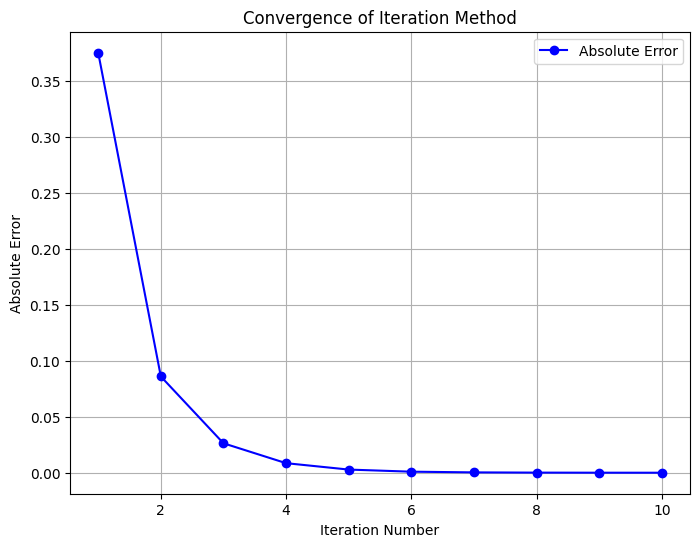

In [207]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(abs_errors) + 1), abs_errors, marker='o', color='blue', label='Absolute Error')
plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error')
plt.title('Convergence of Iteration Method')
plt.grid(True)
plt.legend()
plt.show()